# Восстановление золота из руды

Компание "Цифра", разрабатывающей решения для эффективной работы промышленных предприятий, необходимо разработать прототип модели машинного обучения.

Модель должна предсказывать коэффициент восстановления золота из золотосодержащей рудына основе данных с параметрами добычи и очистки. 

Модель должна оптимизировать производство, чтобы избежать убытков от запуска техпроцессов с убыточными характеристиками.

Вам потребуется:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

## Подготовка данных

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

from time import perf_counter

### Загрузим имеющиеся датасеты и проведём первичный анализ.

In [2]:
df_test = pd.read_csv('datasets/gold_recovery_test_new.csv')
df_train = pd.read_csv('datasets/gold_recovery_train_new.csv')
df_full = pd.read_csv('datasets/gold_recovery_full_new.csv')

In [3]:
df_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [5]:
df_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [7]:
df_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [8]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


Датасеты отличаются по набору параметров, к тому в них имеется незначительное количество пропусков.

### Проверим правильность рассчётов эффективности обогащения для параметра 'rougher.recovery'.

In [9]:
C = df_train['rougher.output.concentrate_au']
F = df_train['rougher.input.feed_au'] 
T = df_train['rougher.output.tail_au'] 

In [10]:
df_train['rougher.recovery.calc'] = (C * (F - T)) / (F * (C - T)) * 100

In [11]:
mae(df_train['rougher.recovery.calc'], df_train['rougher.output.recovery'])

9.73512347450521e-15

Разница между значениями эффективности обогащения из датасета и эффективности обогащения, рассчитаной по данным из датасета, околонулевая, значит целевые признаки рассчитаны верно.

In [12]:
df_train = df_train.drop('rougher.recovery.calc', axis=1)

### Изучим разницу в наборе параметров в обучающей и тестовой выборках.

In [13]:
set(df_train.columns) - set(df_test.columns)

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

В тестовой выборке отсутствует информация о концентрациии сырья и химикатов после каждого техпроцесса, эти данные можно считать подсказкой для будущей модели и их будет необходимо исключить из обучающей выборки.

### Изучим распределение целевых параметров в обучающей и полной выборках.

In [14]:
targets = ['rougher.output.recovery', 'final.output.recovery']

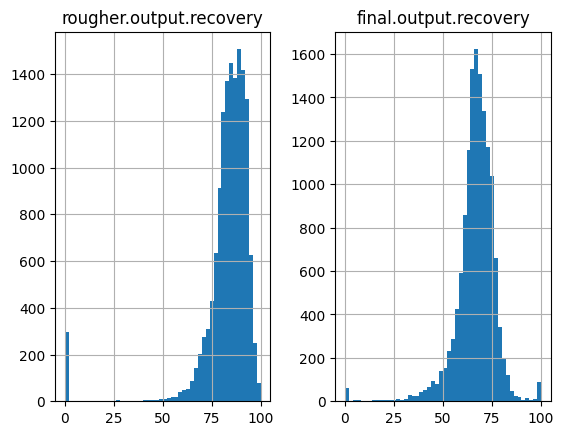

In [15]:
df_train[targets].hist(bins=50);

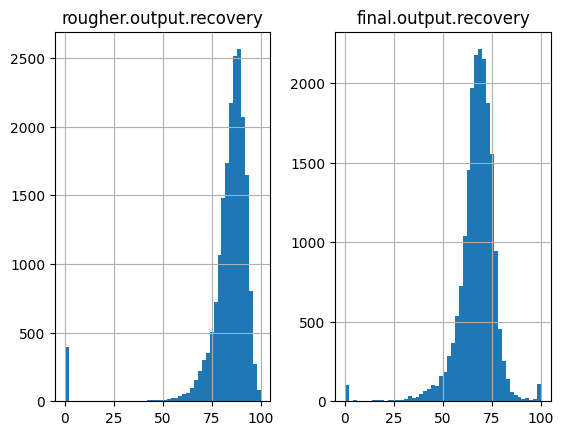

In [16]:
df_full[targets].hist(bins=50);

В данных присутствуют некоторое количество нулевых значений целевых признаков, что скорее всего является пропусками в данных, избавимся от этих строк.

In [17]:
for target in targets:
    df_train = df_train[df_train[target] != 0]
    df_full = df_full[df_full[target] != 0]    

In [18]:
df_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [19]:
df_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


Дополним целевую выборку значениями целевых параметров из полной выборки.

In [20]:
df_test = pd.merge(df_test, df_full[['rougher.output.recovery', 'final.output.recovery', 'date']], on='date', how='left')

In [21]:
df_test[df_test.date == '2016-09-01 00:59:59']['rougher.output.recovery']

0    89.993421
Name: rougher.output.recovery, dtype: float64

In [22]:
df_full[df_full.date == '2016-09-01 00:59:59']['rougher.output.recovery']

4682    89.993421
Name: rougher.output.recovery, dtype: float64

In [23]:
df_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,89.993421,70.273583
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,88.089657,68.910432
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,88.412756,68.143213
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987,87.360133,67.776393
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333,83.236367,61.467078


### Заполним пропуски в технологических данных.

Строки в датасетах собираются последовательно по времени, поэтому пропущенные значения можно заполнить данными из предыдущей строки.

In [24]:
df_train.fillna(method='ffill', inplace=True)
df_test.fillna(method='ffill', inplace=True)
df_full.fillna(method='ffill', inplace=True)

In [25]:
set(df_train.columns) - set(df_test.columns)

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.tail_pb',
 'rougher.output.tail_sol',
 'secondary_cleane

## Анализ данных

### Изучим концентрацию основных веществ ('ag' 'au', 'pb') в ходе основных технологических процессов.

#### Ag

In [26]:
main_stages_ag = ['rougher.input.feed_ag', 'rougher.output.concentrate_ag', \
                  'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']

In [27]:
df_full[main_stages_ag].mean()

rougher.input.feed_ag                     8.788469
rougher.output.concentrate_ag            12.243959
primary_cleaner.output.concentrate_ag     8.459371
final.output.concentrate_ag               5.200005
dtype: float64

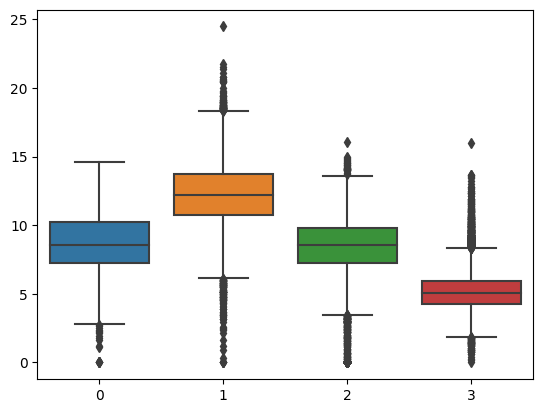

In [28]:
sns.boxplot(data=[df_full['rougher.input.feed_ag'] , df_full['rougher.output.concentrate_ag'], df_full['primary_cleaner.output.concentrate_ag'], df_full['final.output.concentrate_ag']]);

Концентрация серебра повышается после первичной очистки, но снижается ниже начального значения в финальном концентрате.

In [29]:
tails_ag = ['rougher.output.tail_ag', 'primary_cleaner.output.tail_ag',\
            'secondary_cleaner.output.tail_ag', 'final.output.tail_ag']

In [30]:
df_full[tails_ag].mean()

rougher.output.tail_ag               5.579343
primary_cleaner.output.tail_ag      16.145468
secondary_cleaner.output.tail_ag    14.605499
final.output.tail_ag                 9.694420
dtype: float64

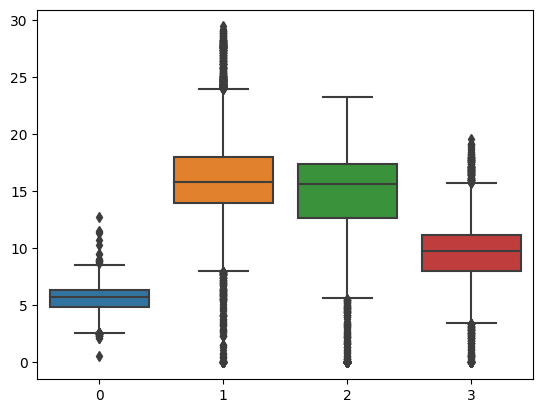

In [31]:
sns.boxplot(data=[df_full['rougher.output.tail_ag'] , df_full['primary_cleaner.output.tail_ag'], df_full['secondary_cleaner.output.tail_ag'], df_full['final.output.tail_ag']]);

Концентрация серебра в отвальных хвостах повышается после первичной очистки, затем снижается, но остаётся вышеначального значения.

#### Au

In [32]:
main_stages_au = ['rougher.input.feed_au', 'rougher.output.concentrate_au', \
                  'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']

In [33]:
df_full[main_stages_au].mean()

rougher.input.feed_au                     8.258139
rougher.output.concentrate_au            20.177817
primary_cleaner.output.concentrate_au    32.101133
final.output.concentrate_au              44.280284
dtype: float64

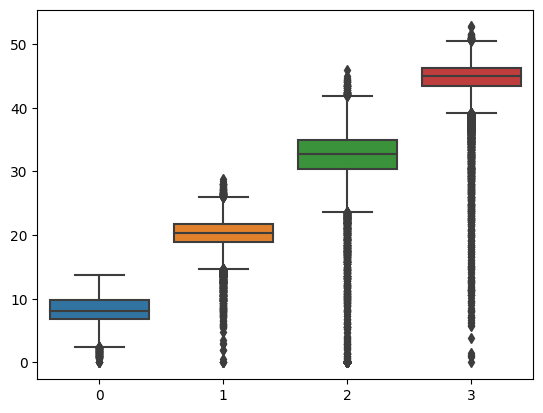

In [34]:
sns.boxplot(data=[df_full['rougher.input.feed_au'] , df_full['rougher.output.concentrate_au'], df_full['primary_cleaner.output.concentrate_au'], df_full['final.output.concentrate_au']]);

Концентрация золота повышается после каждого этапа очистки.

In [35]:
tails_au = ['rougher.output.tail_au', 'primary_cleaner.output.tail_au',\
            'secondary_cleaner.output.tail_au', 'final.output.tail_au']

In [36]:
df_full[tails_au].mean()

rougher.output.tail_au              1.809143
primary_cleaner.output.tail_au      3.892530
secondary_cleaner.output.tail_au    4.303055
final.output.tail_au                3.031744
dtype: float64

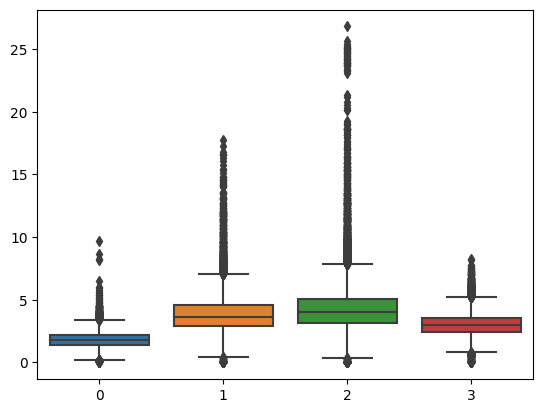

In [37]:
sns.boxplot(data=[df_full['rougher.output.tail_au'] , df_full['primary_cleaner.output.tail_au'], df_full['secondary_cleaner.output.tail_au'], df_full['final.output.tail_au']]);

Концентрация золота в отвальных хвостах повышается после первичной и вторичной очистки.

#### Pb

In [38]:
main_stages_pb = ['rougher.input.feed_pb', 'rougher.output.concentrate_pb', \
                  'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']

In [39]:
df_full[main_stages_pb].mean()

rougher.input.feed_pb                     3.581617
rougher.output.concentrate_pb             7.763225
primary_cleaner.output.concentrate_pb     9.806480
final.output.concentrate_pb              10.034090
dtype: float64

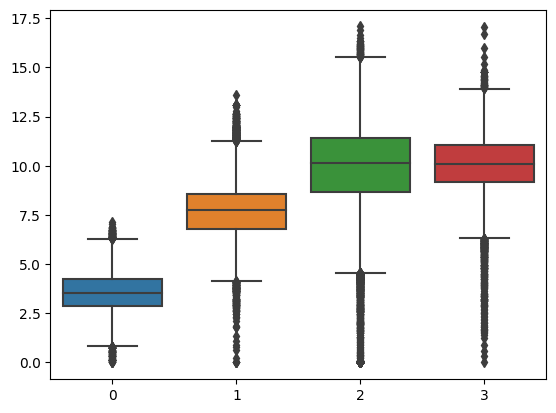

In [40]:
sns.boxplot(data=[df_full['rougher.input.feed_pb'] , df_full['rougher.output.concentrate_pb'], df_full['primary_cleaner.output.concentrate_pb'], df_full['final.output.concentrate_pb']]);

Концентрация свинца повышается с каждым этапом очистки.

In [41]:
tails_pb = ['rougher.output.tail_pb', 'primary_cleaner.output.tail_pb',\
            'secondary_cleaner.output.tail_pb', 'final.output.tail_pb']

In [42]:
df_full[tails_pb].mean()

rougher.output.tail_pb              0.643912
primary_cleaner.output.tail_pb      3.428751
secondary_cleaner.output.tail_pb    5.768740
final.output.tail_pb                2.691339
dtype: float64

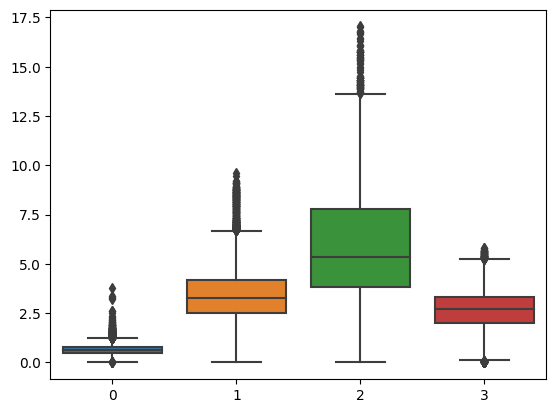

In [43]:
sns.boxplot(data=[df_full['rougher.output.tail_pb'] , df_full['primary_cleaner.output.tail_pb'], df_full['secondary_cleaner.output.tail_pb'], df_full['final.output.tail_pb']]);

Концентрация свинца в отвальных хвостах повышается после первичной и вторичной очистки.

### Сравним распределение размеров гранул сырья в обучающей и тестовой выборках. 

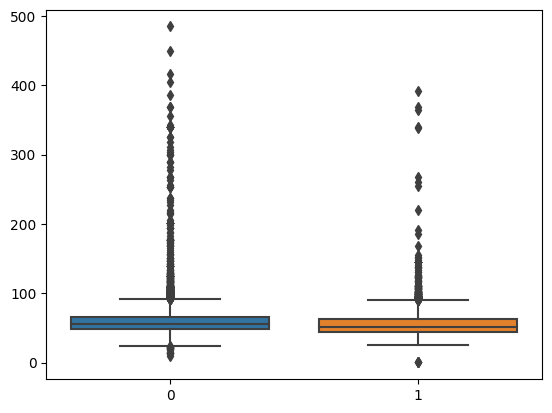

In [44]:
sns.boxplot(data=[df_train['rougher.input.feed_size'], df_test['rougher.input.feed_size']]);

In [45]:
print(df_train['rougher.input.feed_size'].mean(), df_test['rougher.input.feed_size'].mean())

60.25952076361241 55.952754028895136


Значения размеров гранул на этапе флотации примерно равны и распределены похожим образом.

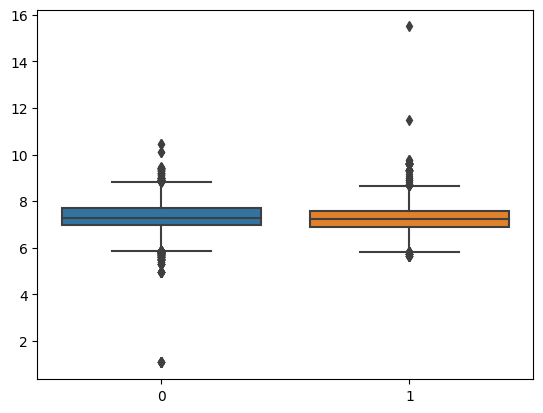

In [46]:
sns.boxplot(data=[df_train['primary_cleaner.input.feed_size'], df_test['primary_cleaner.input.feed_size']]);

In [47]:
print(df_train['primary_cleaner.input.feed_size'].mean(), df_test['primary_cleaner.input.feed_size'].mean())

7.323600740238331 7.266339191270906


Значения размеров гранул в концентрате примерно равны и распределены похожим образом.

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Вывод верный!</font>

### Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. 

добавим в датасет интересующие нас данные.

In [48]:
total_gathering = ['rougher_input', 'rougher_output', 'final_output_sum']

Концентрация веществ в сырье:

In [49]:
df_full['rougher_input'] = df_full['rougher.input.feed_ag'] + df_full['rougher.input.feed_pb'] +\
df_full['rougher.input.feed_sol'] + df_full['rougher.input.feed_au']

Концентрация веществ черновом концентрате:

In [50]:
df_full['rougher_output'] = df_full['rougher.output.concentrate_ag'] + df_full['rougher.output.concentrate_pb'] +\
df_full['rougher.output.concentrate_sol'] + df_full['rougher.output.concentrate_au']

Концетрация веществ в финальном цонцентрате:

In [51]:
df_full['final_output_sum'] = df_full['final.output.concentrate_ag'] + df_full['final.output.concentrate_pb'] +\
df_full['final.output.concentrate_sol'] + df_full['final.output.concentrate_au']

In [52]:
df_full[total_gathering].head()

,rougher_input,rougher_output,final_output_sum
0,51.680034,66.424950,63.644396
1,50.659114,67.012710,63.957723
2,50.609929,66.103793,64.311180
3,51.061546,65.752751,63.573449
4,47.859163,65.908382,64.004667


Изучим распределение этих концентраций.

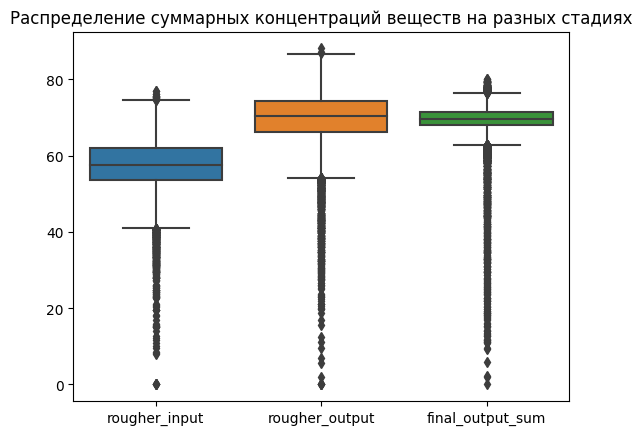

In [53]:
sns.boxplot(data=df_full[total_gathering]).set(title = 'Распределение суммарных концентраций веществ на разных стадиях');



На графике видно некоторое количество аномальных измерений, статистических выбросов и даже нулевых значений.
Избавимся от этих значений.

In [54]:
for stage in total_gathering:
    #print(stage)
    top_threshold = df_full[stage].quantile(0.75) + 1.5 * \
(df_full[stage].quantile(0.75) - df_full[stage].quantile(0.25))
    #print(top_threshold)
    bot_threshold = df_full[stage].quantile(0.25) - 1.5 * \
(df_full[stage].quantile(0.75) - df_full[stage].quantile(0.25))
    #print(bot_threshold)
    
    df_full = df_full.loc[(df_full[stage] > bot_threshold) & (df_full[stage] < top_threshold)]
    #print(total_gathering.shape)

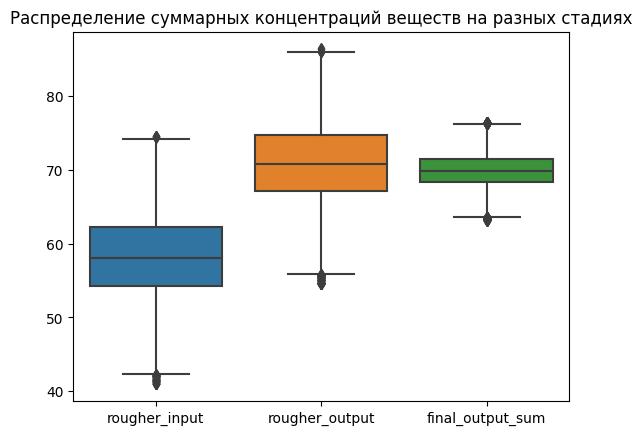

In [55]:
sns.boxplot(data=df_full[total_gathering]).set(title = 'Распределение суммарных концентраций веществ на разных стадиях');



Оставим в обучающем, тестовом и полном датасетах только те строки, что встречаются в оищенном вспомогательном датасете.

In [56]:
df_train = pd.merge(df_train, df_full['date'], on='date', how='inner')

In [57]:
df_full = df_full.drop(total_gathering, axis=1)

## Построение модели

### Создадим функцию симметричного среднего абсолютного процентного отклонения в качестве метрики качества нашей модели

In [58]:
def smape(valid, predicted):
    deviations = []
    for val, pred in zip(valid, predicted):
          deviations.append(abs(val - pred) / ((abs(val) + abs(pred))/2))
    
    return (1 / len(valid)) * sum(deviations) * 100

In [59]:
def smape_numpy(valid, predicted):
    valid = np.array(valid)
    prediction = np.array(predicted)
    return np.sum(np.absolute(valid - predicted) / ((np.absolute(valid) + np.absolute(predicted)) / 2)) / len(valid) * 100

In [60]:
smape([1,1], [2,2])

66.66666666666666

In [61]:
smape_numpy([1,1], [2,2])

66.66666666666666

Итоговая метрика будет показывать метрику эффективности двух целевых показателей, эффективности обогащения в черновом и финалном концентрате.

In [62]:
def final_smape(smape_rougher, smape_final):
        return (0.25 * smape_rougher) + (0.75 * smape_final)

Исключим ненужные параметры из обучающей выборки.

In [63]:
df_train = df_train[df_test.columns]

Выделим целевые признаки и параметры.

In [64]:
features = df_train.drop(['rougher.output.recovery','final.output.recovery', 'date'],axis=1)
target_rougher = df_train['rougher.output.recovery']
target_final = df_train['final.output.recovery']

Отмасштабируем параметры.

In [65]:
scaler = StandardScaler()
scaler.fit(features)
features_scaled = scaler.transform(features)

### Применим модель линейной регрессии и определим оптимальное значений блоков для кроссвалидации.

In [66]:
model = LinearRegression()

smape_scorer = make_scorer(smape)

best_score = 100000
best_cv = None

for crossval in range(2, 11):
    t_start = perf_counter()
    rougher_scores = abs(cross_val_score(model, features_scaled, target_rougher, \
                                 scoring=smape_scorer, cv=crossval)).mean()
    final_scores = abs(cross_val_score(model, features_scaled, target_final, \
                                 scoring=smape_scorer, cv=crossval)).mean()
    
    score = final_smape(rougher_scores, final_scores)
    #print(score)
    t_stop = perf_counter()
    
     #if t_stop - t_start > 0.5:
         #break
    
    if score < best_score:
        best_score = score
        best_cv = crossval
        
    
    #print(crossval, score, t_stop - t_start)

print('Лучшая sMAPE-оценка модели линейной регрессии на обучающей выборке', best_score)
print('Оптимальное количество блоков для кросс-валидации', best_cv)

Лучшая sMAPE-оценка модели линейной регрессии на обучающей выборке 8.205106518558141
Оптимальное количество блоков для кросс-валидации 10


In [67]:
model = LinearRegression()

smape_scorer = make_scorer(smape_numpy)

best_score = 100000
best_cv = None

for crossval in range(2, 11):
    t_start = perf_counter()
    rougher_scores = abs(cross_val_score(model, features_scaled, target_rougher, \
                                 scoring=smape_scorer, cv=crossval)).mean()
    final_scores = abs(cross_val_score(model, features_scaled, target_final, \
                                 scoring=smape_scorer, cv=crossval)).mean()
    
    score = final_smape(rougher_scores, final_scores)
    #print(score)
    t_stop = perf_counter()
    
#     if t_stop - t_start > 0.5:
#         break
    
    if score < best_score:
        best_score = score
        best_cv = crossval
        
    
    #print(crossval, score, t_stop - t_start)

print('Лучшая sMAPE-оценка модели линейной регрессии на обучающей выборке', best_score)
print('Оптимальное количество блоков для кросс-валидации', best_cv)

Лучшая sMAPE-оценка модели линейной регрессии на обучающей выборке 8.205106518558143
Оптимальное количество блоков для кросс-валидации 10


### Применим модель дерева решений и определим оптимальную глубину модели.

In [68]:
%%time

smape_scorer = make_scorer(smape)
best_score = 100000
best_depth = None

for depth in range(1, 16, 1):
    t_start = perf_counter()
    model = DecisionTreeRegressor(max_depth=depth)
    
    rougher_scores = abs(cross_val_score(model, features_scaled, target_rougher, \
                                 scoring=smape_scorer, cv=best_cv)).mean()
    final_scores = abs(cross_val_score(model, features_scaled, target_final, \
                                 scoring=smape_scorer, cv=best_cv)).mean()
    score = final_smape(rougher_scores, final_scores)
    
    t_stop = perf_counter()
    
    if t_stop - t_start > 6:
        break
    
    if score < best_score:
        best_score = score
        best_depth = depth       
        
    #print(depth, score, t_stop - t_start)
    
print('Лучшая sMAPE-оценка модели дерева решений на обучающей выборке', best_score)
print('Оптимальная глубина модели', best_depth)

Лучшая sMAPE-оценка модели дерева решений на обучающей выборке 7.932433570722038
Оптимальная глубина модели 4
CPU times: user 19.3 s, sys: 39.1 ms, total: 19.3 s
Wall time: 18.8 s


In [69]:
%%time

smape_scorer = make_scorer(smape_numpy)
best_score = 100000
best_depth = None

for depth in range(1, 16, 1):
    t_start = perf_counter()
    model = DecisionTreeRegressor(max_depth=depth)
    
    rougher_scores = abs(cross_val_score(model, features_scaled, target_rougher, \
                                 scoring=smape_scorer, cv=best_cv)).mean()
    final_scores = abs(cross_val_score(model, features_scaled, target_final, \
                                 scoring=smape_scorer, cv=best_cv)).mean()
    score = final_smape(rougher_scores, final_scores)
    
    t_stop = perf_counter()
    
    if t_stop - t_start > 6:
        break
    
    if score < best_score:
        best_score = score
        best_depth = depth       
        
    #print(depth, score, t_stop - t_start)
    
print('Лучшая sMAPE-оценка модели дерева решений на обучающей выборке', best_score)
print('Оптимальная глубина модели', best_depth)

Лучшая sMAPE-оценка модели дерева решений на обучающей выборке 7.851606249435552
Оптимальная глубина модели 4
CPU times: user 25.7 s, sys: 1.49 ms, total: 25.7 s
Wall time: 25.7 s


### Применим модель случайного леса и определим оптимальное кочество деревьев.

In [70]:
%%time

best_score = 100000
best_est = None

for est in range(10, 101, 5):
    t_start = perf_counter()
    
    model = RandomForestRegressor(n_estimators=est, max_depth=best_depth)
    
    rougher_scores = abs(cross_val_score(model, features_scaled, target_rougher, \
                                 scoring=smape_scorer, cv=best_cv)).mean()
    final_scores = abs(cross_val_score(model, features_scaled, target_final, \
                                 scoring=smape_scorer, cv=best_cv)).mean()
    score = final_smape(rougher_scores, final_scores)
    
    t_stop = perf_counter()
    
    if t_stop - t_start > 100:
        break
    
    if score < best_score:
        best_score = score
        best_est = est
    
    #print(est, score, t_stop - t_start)
    
print('Лучшая sMAPE-оценка модели случайного леса на обучающей выборке', best_score)
print('Оптимальное количество деревьев', best_est)

Лучшая sMAPE-оценка модели случайного леса на обучающей выборке 7.581407071259729
Оптимальное количество деревьев 15
CPU times: user 5min 34s, sys: 98.8 ms, total: 5min 34s
Wall time: 5min 34s


### Воспользуемся найденными параметрами модели для оценки модели на тестовой выборке.

Модель случайного леса с оптимальными параметрами:

In [71]:
best_model = RandomForestRegressor(n_estimators=best_est, max_depth=best_depth)

Выделим целевые признаки и парметры тестовой выборки.

In [72]:
test_features = df_test.drop(['rougher.output.recovery','final.output.recovery', 'date'],axis=1)
test_features_scaled = scaler.transform(test_features)

test_target_rougher = df_test['rougher.output.recovery']
test_target_final = df_test['final.output.recovery']

Получим предсказанные значения целевых признаков для тестовой выборки.

In [73]:
test_rougher_predict = best_model.fit(features_scaled, target_rougher).predict(test_features_scaled)
test_final_predict = best_model.fit(features_scaled, target_final).predict(test_features_scaled)

Оценим эффективность модели на тестовой выборке.

In [74]:
smape_rougher = smape(test_target_rougher, test_rougher_predict)
smape_final = smape(test_target_final, test_final_predict)
test_smape = final_smape(smape_rougher, smape_final)

print('sMAPE-оценка модели на тестовой выборке', round(test_smape, 2), '%')

sMAPE-оценка модели на тестовой выборке 7.4 %


In [75]:
dummy_model = DummyRegressor(strategy='mean')
dummy_rougher = dummy_model.fit(features_scaled, target_rougher).predict(test_features_scaled)
dummy_final = dummy_model.fit(features_scaled, target_final).predict(test_features_scaled)

smape_rougher = smape(test_target_rougher, dummy_rougher)
smape_final = smape(test_target_final, dummy_final)
test_smape = final_smape(smape_rougher, smape_final)

print('sMAPE-оценка dummy модели на тестовой выборке', round(test_smape, 2), '%')

sMAPE-оценка dummy модели на тестовой выборке 7.7 %


Результаты полученной модели незначительно отличаются от результатов дамми-модели, а значит полученая модель не является адекватной.

## Выводы по проделанной работе:

1. Был проведён первоначальный анализ и предобработка имеющихся данных, проверена правильность рассчёта эффективности обогащеиня.
1. Датасеты были очищены от пропущенных значений.
1. Были показаны изменения концентраций основных веществ на различных этапах очистки.
1. Размеры гранул сырья в черновом и финальном концентрате одинаково распределены в обучающей и тестовой выборке, а значит обученная модель будет пригодна для данных из тестовой выборки.
1. Было исследовано распределение концентраций основных веществ на главных этапах очистки, и на основании этого исходные датасеты были очищены от аномальных значений.
1. Было построено несколько моделей прогнозирования, определены оптимальные параметры моделей, после чего была оценена эффективность модели на тестовой выборке по метрике smape.